#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.

### You would need to submit your GitHub repository link. Refer to the PDF document for the instructions and details.





In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
## Reading the image plaksha_Faculty.jpg
img = cv2.imread("plaksha_Faculty.jpg")

## Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
  
# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 
# Define the text and font parameters
text = "Face"
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.5
font_color = (0,0,255)
font_thickness = 1

  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    cv2.putText(img, text, (x, y-5), font, font_scale, font_color, font_thickness)
    
## Display the image and window title should be "Total number of face detected are #"  
cv2.imshow("Total number of face detected are " + str(len(faces_rect)), img)
cv2.waitKey(0)
cv2.destroyAllWindows()

![alt text](<Screenshot 2026-02-16 000236.png>)

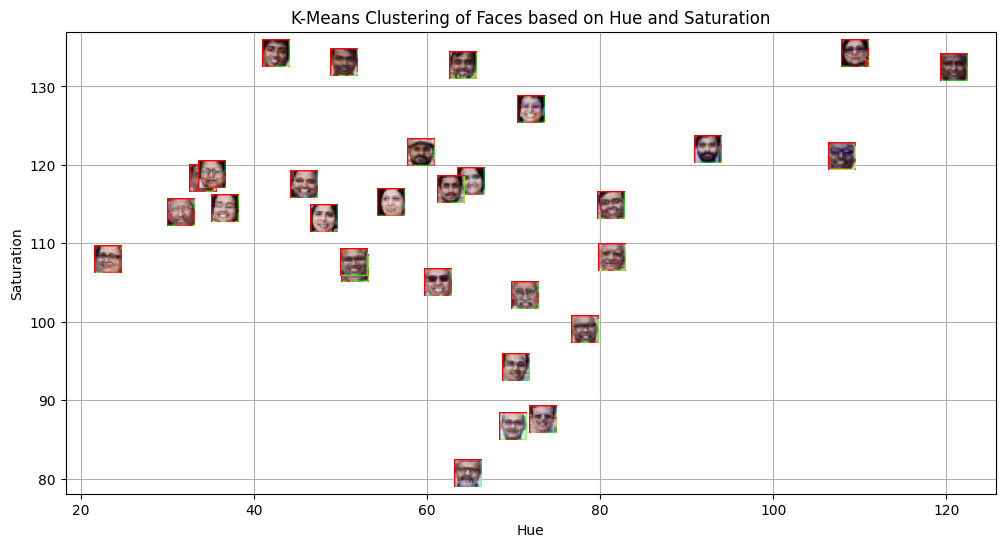

In [3]:

from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(hue_saturation)
#centroids = kmeans.cluster_centers_
#labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x, y, w, h) in enumerate(faces_rect):
    im = OffsetImage(
        cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB)
    )
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]),
                        frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])

## Put x label
plt.xlabel("Hue")

## Put y label
plt.ylabel("Saturation")

## Put title
plt.title("K-Means Clustering of Faces based on Hue and Saturation")

## Put grid
plt.grid(True)

## show the plot
plt.show()

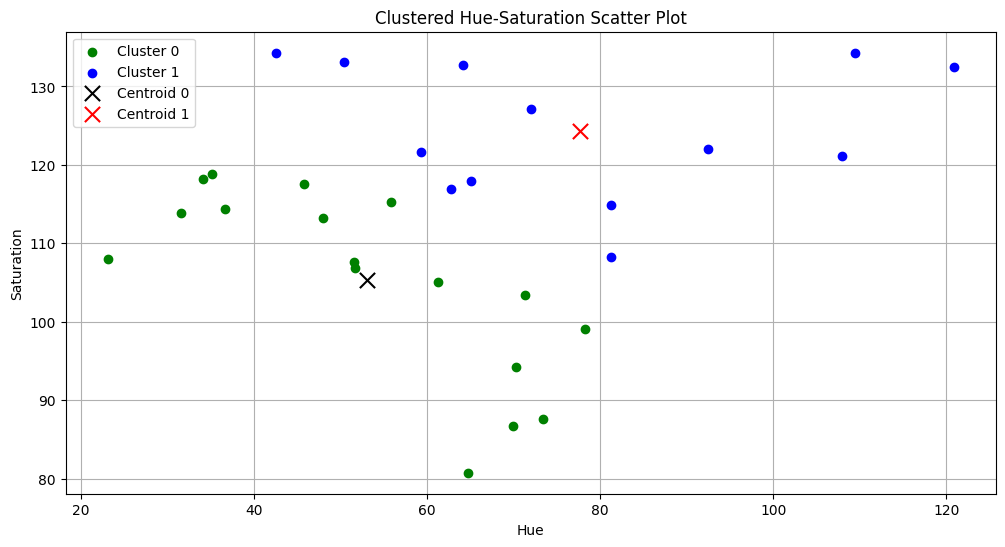

In [4]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))

for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

cluster_0_points = np.array(cluster_0_points)
cluster_1_points = np.array(cluster_1_points)

# Plot points for cluster 0 in green
if len(cluster_0_points) > 0:
    plt.scatter(cluster_0_points[:,0], cluster_0_points[:,1],
                c='green', label='Cluster 0')

# Plot points for cluster 1 in blue
if len(cluster_1_points) > 0:
    plt.scatter(cluster_1_points[:,0], cluster_1_points[:,1],
                c='blue', label='Cluster 1')

# Calculate centroids safely
if len(cluster_0_points) > 0:
    centroid_0 = np.mean(cluster_0_points, axis=0)
    plt.scatter(centroid_0[0], centroid_0[1],
                c='black', marker='x', s=120, label='Centroid 0')

if len(cluster_1_points) > 0:
    centroid_1 = np.mean(cluster_1_points, axis=0)
    plt.scatter(centroid_1[0], centroid_1[1],
                c='red', marker='x', s=120, label='Centroid 1')

## Put x label
plt.xlabel("Hue")

## Put y label
plt.ylabel("Saturation")

## Put title
plt.title("Clustered Hue-Saturation Scatter Plot")

## Add a legend
plt.legend()

## Add grid
plt.grid(True)

## Show the plot
plt.show()

In [5]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread("Dr_Shashi_Tharoor.jpg")

# Detect face in the template image after converting it to gray and store it in template_faces
template_faces = face_cascade.detectMultiScale(
    cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY),
    1.05,
    4,
    minSize=(25,25),
    maxSize=(200,200)
)

# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)

cv2.imshow("Detected Face in Template Image", template_img)
cv2.waitKey(0)
cv2.destroyAllWindows() 

![Screenshot 2026-02-15 202421.png](<attachment:Screenshot 2026-02-15 202421.png>)
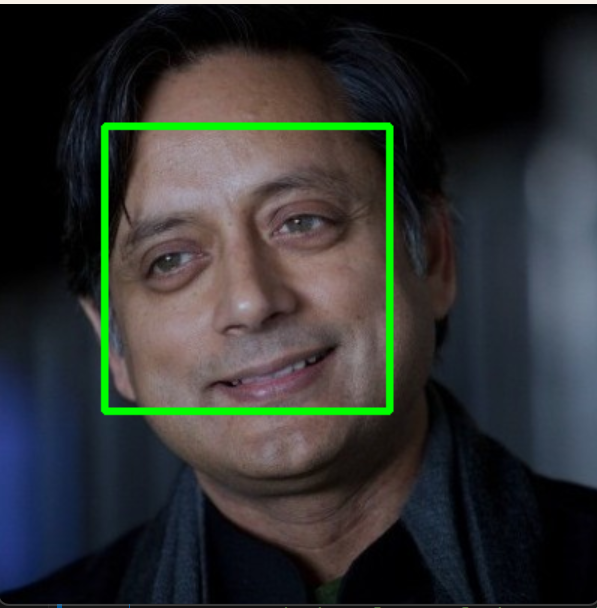

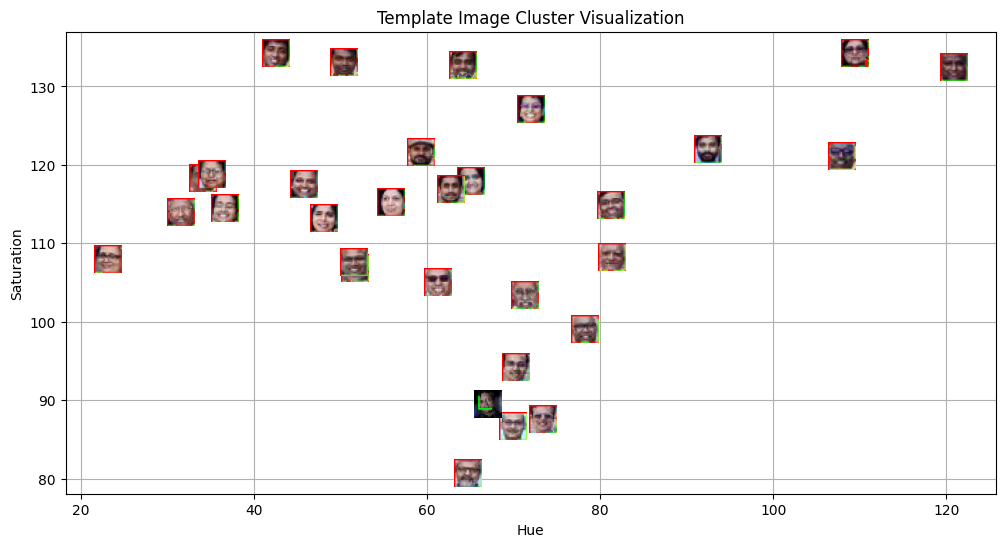

In [6]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:, :, 0])
template_saturation = np.mean(template_hsv[:, :, 1])

# Predict the cluster label for the template image and store it in template_label
template_label = kmeans.predict([[template_hue, template_saturation]])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'

im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

## Put x label
plt.xlabel("Hue")

## Put y label
plt.ylabel("Saturation")

## Put title
plt.title("Template Image Cluster Visualization")

## Add grid
plt.grid(True)

## show plot
plt.show()

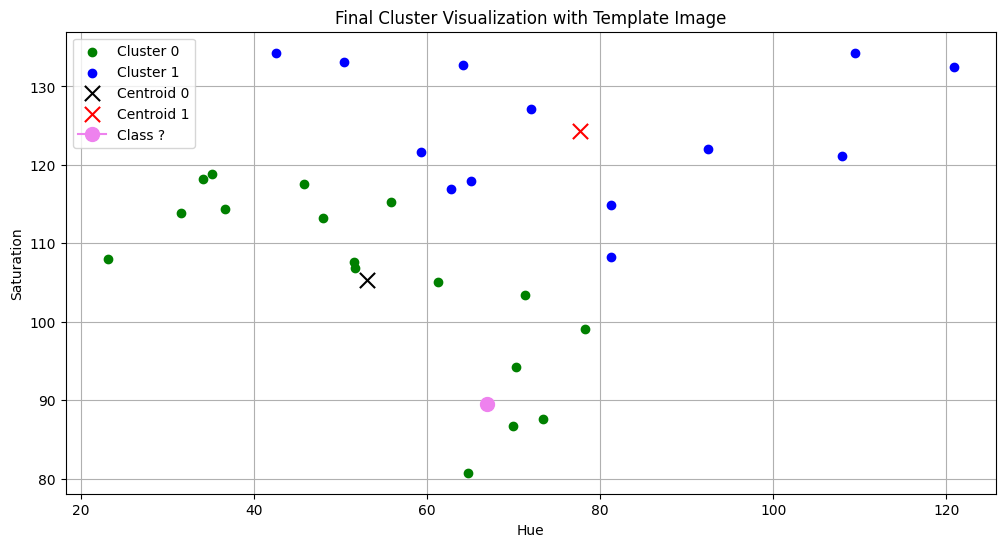

In [7]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:,0], cluster_0_points[:,1], c='green', label='Cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:,0], cluster_1_points[:,1], c='blue', label='Cluster 1')

# Calculate and plot centroids for both the clusters
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)
plt.scatter(centroid_0[0], centroid_0[1], c='black', marker='x', s=120, label='Centroid 0') ## plot for centroid 0
plt.scatter(centroid_1[0], centroid_1[1], c='red', marker='x', s=120, label='Centroid 1')  ## plot for centroid 1

plt.plot(template_hue, template_saturation, marker='o', c='violet', markersize=10, label='Class ?')

## Put x label
plt.xlabel("Hue")

## Put y label
plt.ylabel("Saturation")

## Put title
plt.title("Final Cluster Visualization with Template Image")

## Add a legend
plt.legend()

## Add grid
plt.grid(True)

## show the plot
plt.show()

## 1. What are the common distance metrics used in distance-based classification algorithms?

Distance-based classification algorithms, such as K-Nearest Neighbors (KNN), rely on similarity measures to compare data points. Some commonly used distance metrics include:

- **Euclidean Distance:** Measures the straight-line distance between two points in multidimensional space and is widely used when features are continuous.
- **Manhattan Distance:** Calculates the sum of absolute differences between coordinates; useful when movement follows grid-like paths.
- **Minkowski Distance:** A generalized metric that includes Euclidean and Manhattan distances as special cases depending on the value of parameter \(p\).
- **Cosine Similarity / Cosine Distance:** Measures the angle between two vectors and is often used in text or high-dimensional data analysis.
- **Hamming Distance:** Used for categorical or binary features by counting the number of differing elements.

These metrics determine how “close” data samples are, which directly influences classification decisions.



## 2. What are some real-world applications of distance-based classification algorithms?

Distance-based algorithms are widely used in real-world scenarios due to their simplicity and interpretability. Examples include:

- **Image Recognition and Face Detection:** Identifying similar facial patterns based on feature distances.
- **Recommendation Systems:** Suggesting products or content by finding users with similar behaviour or preferences.
- **Medical Diagnosis:** Classifying patients based on symptom similarity or medical feature data.
- **Fraud Detection:** Detecting abnormal transactions by measuring distance from normal behavioural patterns.
- **Text Classification:** Grouping documents based on similarity of word embeddings or feature vectors.

These applications rely on measuring similarity between samples rather than building complex parametric models.



## 3. Explain various distance metrics.

Different distance metrics capture similarity in different ways:

**Euclidean Distance**

$$ d(x,y) = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2} $$

Represents geometric distance and is sensitive to feature scaling.

**Manhattan Distance**

$$ d(x,y) = \sum_{i=1}^{n} |x_i - y_i| $$

Robust to outliers and suitable for high-dimensional data.

**Minkowski Distance**

$$ d(x,y) = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{1/p} $$

When $p=1$ it becomes Manhattan distance, and when $p=2$ it becomes Euclidean distance.

## 4. What is the role of cross-validation in model performance?

Cross-validation is a technique used to evaluate how well a model generalizes to unseen data. Instead of splitting data once into training and testing sets, the dataset is divided into multiple folds. The model is trained on several folds and validated on the remaining fold repeatedly.

Its main roles include:

- **Reducing Overfitting:** Ensures the model does not memorize training data.
- **Reliable Performance Estimation:** Provides a more stable estimate of accuracy compared to a single train-test split.
- **Hyperparameter Tuning:** Helps select optimal parameters such as the value of \(K\) in KNN.
- **Model Comparison:** Allows fair comparison between different algorithms.

Thus, cross-validation improves robustness and reliability of model evaluation.



## 5. Explain variance and bias in terms of KNN.

In KNN, the choice of the parameter \(K\) directly affects bias and variance:

- **Low \(K\) (e.g., \(K=1\))**
  - Low bias because the model closely follows training data.
  - High variance because predictions change significantly with small changes in data.
  - Risk of overfitting.

- **High \(K\)**
  - Higher bias because the model smooths decision boundaries.
  - Lower variance because predictions become more stable.
  - Risk of underfitting.

The goal is to find a balance where both bias and variance are minimized, often achieved using cross-validation.